# Linear Regression Modeling
## Alfonso Esqueda

### Attempt with Random Forest Modeling

In [1]:
#Import pandas, numpy, and matplotlib.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Reading Insurance csv file
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,NaN
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


### 1.	Perform EDA on the dataset and provide 5 insights you learn

In [3]:
df.describe().round(0)

,age,bmi,children,charges
count,1336.0,1338.0,1338.0,1336.0
mean,39.0,31.0,1.0,13272.0
std,14.0,6.0,1.0,12112.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4744.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16604.0
max,64.0,53.0,5.0,63770.0


#### The average of the following:
#### -- Age : 39
#### -- BMI:  31
#### -- Children: 1
#### -- Charges: 13,272

In [4]:
# Quick EDA

print ("Dataset Column Names")
print(df.columns)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Dataset Data Types")
print(df.dtypes)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Are there any missing values?")
print(df.columns[df.isnull().any()].tolist())
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print("Dataset Dimension")
print(df.shape)
print("~~~~~~~~~~~~~~~~~~")

Dataset Column Names
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~
Dataset Data Types
age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~
Are there any missing values?
['age', 'charges']
~~~~~~~~~~~~~~~~~~~~~~~
Dataset Dimension
(1338, 7)
~~~~~~~~~~~~~~~~~~


#### The data types for this dataset are floats, objects, and integers.

#### There is one conflicting datatype is float in the Age variable since age is usually measured in integers (non decimal numbers) which I will change the dataype later in the document. Another conflicting datatype is Children since it can become an object since there are no arithmetic functions done with children.

In [5]:
#Convert the variable age from float to integer
#df["age"] = df["age"].astype(int)

In [6]:
# Missing Variables
print(df.isnull().sum().sort_values(ascending=False).head())

age         2
charges     2
sex         0
bmi         0
children    0
dtype: int64


#### There is missing values in age and charges that wil need imputaiton in order to proceed with the modeling process.

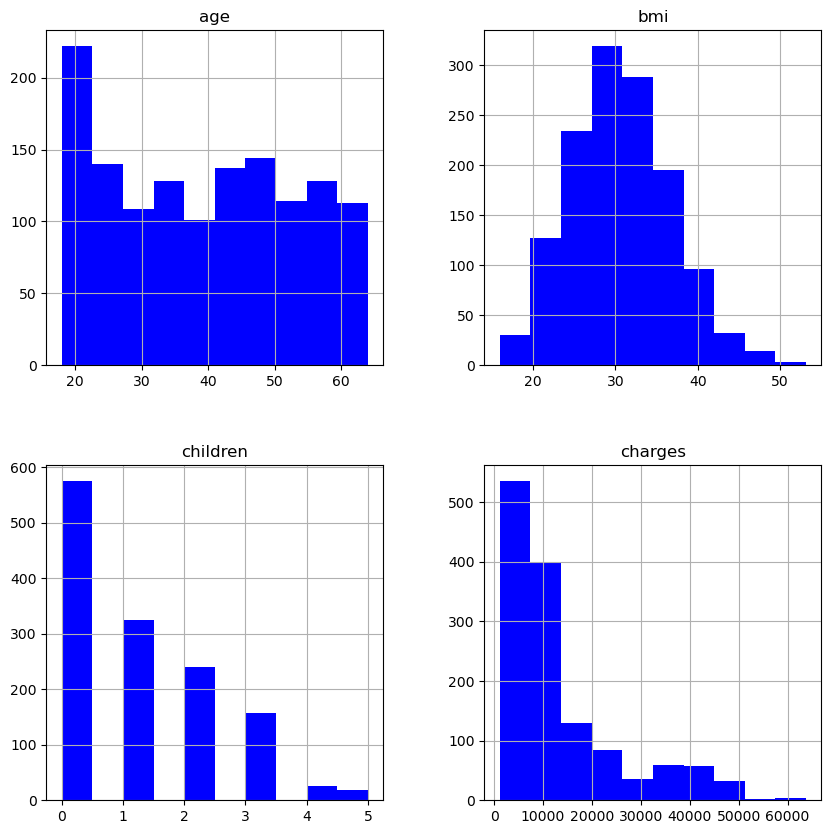

In [7]:
df.hist(bins=10,figsize= (10,10), color='blue')
plt.show()

#### The graphs above help us better understand the numeric values of the dataset. Some variables are not included (sex, smoker, and region) because they are not numeric. 


#### The following skewed disribution for the variables:
#### * BMI has a right distribution with a small right positive skew. The highest peak on the dataset is around 30 BMI indicating the most amount of count values around 30% Body Mass Index.

#### * Charges has a right distribution with a positive skew. Shows there is mainly a lower number of high charges and that small chargers are more prominent.

#### * Children has a right distribution with a positive skew. The long right tail is not as prominent. We can see that most individuals with few to no kids.

#### * Age has a similar right distribution although the tail is the shortest from all the other distribution variables. This makes sense since Age is using integer datatype while it is not needed. The graph then shows a peark at 20 years old which means there is a younger audience in this dataset.

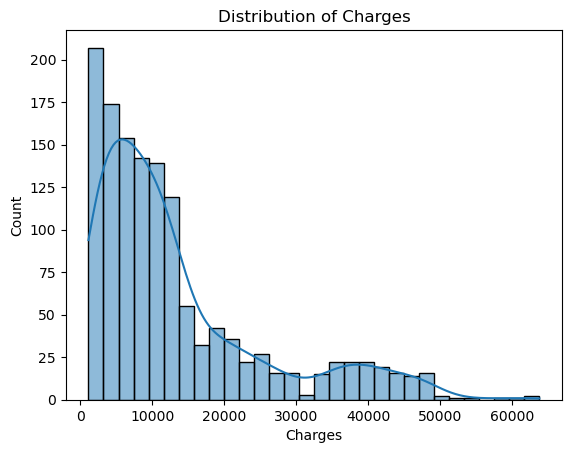

In [56]:
# Visualize the distribution of the target variable
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.show()

#### The distribution of charges is positive right distribution. In a right-skewed distribution, the mean is typically greater than the median, indicating that the average value is higher than the middle value.  This is caused because of the larger avergae charges at the end of the graph.

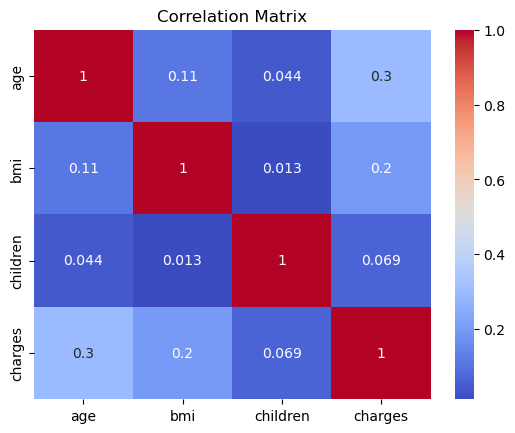

In [9]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=0)
plt.title("Correlation Matrix")
plt.show()

#### There is a 11% correlation between bmi and age.
#### There is a 4.4% correlation between children and age
#### There is a 1.3% correlation between children and bmi
#### There is a 20% correlation between charges and bmi
#### There is a 6.9% correlation between charges and children

#### Correlation is an important concept in this EDA  analysis because it measures the degree to which two variables are related or associated with each other. Specifically, correlation refers to the statistical relationship between two variables, where changes in one variable are associated with changes in the other variable.

### 2.	Impute any missing values and explain your approach.

In [10]:
# Missing Variables
print(df.isnull().sum().sort_values(ascending=False).head())

age         2
charges     2
sex         0
bmi         0
children    0
dtype: int64


In [11]:
age_median = df['age'].median()
charges_median = df['charges'].median()

print("Age median: ", age_median)
print("Charges median: ", charges_median)

Age median:  39.0
Charges median:  9382.033


In [12]:
df["age"] = df["age"].fillna(df["age"].median()).round(2)
print(df["age"])

df["charges"] = df["charges"].fillna(df["charges"].median()).round(2)
print(df["charges"])

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    39.0
Name: age, Length: 1338, dtype: float64
0       16884.92
1        9382.03
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: charges, Length: 1338, dtype: float64


In [13]:
# Now the are no missing variables
print(df.isnull().sum().sort_values(ascending=False).head())

age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64


#### I used the median (Age = 39.0, Charges = 9,382.03) for the imputation of the missing variables due to the skewed data that was visualized in the beginning of the file. Since the median is less sensitive to outliers than the mean, it provides a better representation of the central tendency of the data. Median imputation is also less affected by extreme values and can be used when the data is not normally distributed.

### 3.	Convert all of the object variables into numeric variables 

In [14]:
print ("Dataset Data Types")
print(df.dtypes)

Dataset Data Types
age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [15]:
# create a mapping dictionary
smoker_map = {'yes': 1, 'no': 0}
# apply the mapping dictionary to the "Smoker" column
df['smoker'] = df['smoker'].map(smoker_map)
# convert the "Smoker" column to a numeric data type
df['smoker'] = pd.to_numeric(df['smoker'])

In [16]:
df.dtypes

age         float64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [17]:
# replace 'soothwest' with 'southwest' in the 'region' column
df['region'] = df['region'].replace('soothwest', 'southwest')
df['region'].head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [18]:
# create mapping dictionaries
sex_map = {'male': 0, 'female': 1}
region_map = {'northeast': 0, 'northwest': 1, 'southwest': 2, 'southeast': 3}

# apply mapping dictionaries to "sex" and "region" columns
df['sex'] = df['sex'].map(sex_map)
df['region'] = df['region'].map(region_map)

In [19]:
print(df.dtypes)
print(df.head())

age         float64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
    age  sex     bmi  children  smoker  region   charges
0  19.0    1  27.900         0       1       2  16884.92
1  18.0    0  33.770         1       0       3   9382.03
2  28.0    0  33.000         3       0       3   4449.46
3  33.0    0  22.705         0       0       1  21984.47
4  32.0    0  28.880         0       0       1   3866.86


#### I used the mapping function to make the object variables (sex, smoker, and region)
#### I learned how to do it in the following link https://www.geeksforgeeks.org/python-map-function/

### 4.	Split the dataset into training and test set. 

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# random_state: select random number. This will ensure that your test/train split remains the same across executions

# Select relevant features
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Select the target variable
y = df['charges']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(268, 6)
(1070, 6)
(268,)
(1070,)


#### I chose an 80 - 20 split for my test and train set.

### 5.	Using all the predictors given, run a “full” multiple linear regression model.

In [23]:
# Running linear regression model on training dataset using statsmodels
import statsmodels.api as sm
# Add a constant to get an intercept - you must do this!
x_train_sm = sm.add_constant(x_train)
# Fit the resgression line using ‘OLS’
lr = sm.OLS(y_train, x_train_sm).fit()

### OLS Model
#### This is model is not beneficial since it is not commonly used to perform operations with but I added it to have a reference of what to expect for stats from the insurance data.

#### My first model is the full kitchen sink model, further in this document.

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     500.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.58e-305
Time:                        16:51:37   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.218e+04   1093.836    -11.140      0.0

### Kitchen Sink Model

In [25]:
from sklearn.linear_model import LinearRegression

# CREATE the linear regression model
model = LinearRegression()

# FIT the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [26]:
#let's use pandas to rearrange the data in a way that is easy to read
coeff = pd.DataFrame({'Predictor': x.columns, 'coefficient': model.coef_})
coeff

,Predictor,coefficient
0,age,255.282594
1,sex,38.210103
2,bmi,342.732244
3,children,429.715171
4,smoker,23626.338282
5,region,-224.546714


### Layman's term
#### For each additional 1unit in age, charges will increase by 255.28
#### For each additional 1unit in sex, charges will increase by 38.21
#### For each additional 1unit in bmi, charges will increase by 342.73
#### For each additional 1unit in children, charges will increase by 429.71
#### For each additional 1unit in smoker, charges will increase by 23626.33
#### For each additional 1unit in region, charges will decrease by -224.54

In [27]:
# PREDICT on the test data
y_pred = model.predict(x_test)
y_pred

array([ 8828.69119214,  7107.70851346, 36807.49383751,  9446.28951934,
       27007.22386092, 11178.49298307,   195.69892715, 16919.85478123,
         927.01301033, 11221.48375944, 28302.58471828,  9400.69910112,
        5153.97723558, 38314.60328575, 40109.30697615, 36971.45375609,
       15175.70935759, 35788.23720432,  8965.97367475, 31446.55936728,
        4087.89768786, 10375.60938545,  2635.38585415,  7111.93392149,
       11319.61907746, 12839.00968512, 14751.02385098,  6229.54893595,
        9827.6498275 ,  2066.44616309,  9376.38564479, 13087.27468415,
        4491.62756205,  3413.84476741,  4714.98628467, 12945.22347607,
        2242.94734039,  9058.72725851, 33229.59055078, 32451.81146005,
        4205.25377512,  4381.0911526 , 14399.52121789, 11378.13903532,
        8677.84330211, 12282.4812707 ,  5375.16334982,  3403.770346  ,
       35362.12378745,  9072.09123867, 15703.60361147,  2232.25750657,
       12465.70164194,  1364.01634473, 13237.50605511, 12443.74217021,
      

In [28]:
# Actual vs Predicted Values
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff': y_pred-y_test})
diff

,Actual,Predicted,Diff
764,9095.07,8828.691192,-266.378808
887,5272.18,7107.708513,1835.528513
890,29330.98,36807.493838,7476.513838
1293,9301.89,9446.289519,144.399519
259,33750.29,27007.223861,-6743.066139
...,...,...,...
109,47055.53,38877.025775,-8178.504225
575,12222.90,11747.138682,-475.761318
535,6067.13,7550.574656,1483.444656
543,63770.43,40840.153780,-22930.276220


In [29]:
# Calculation for the R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 0.7836765301428436


#### The goodness of fit is 78.36% which means that the predictions are almost 80% close to tge actual charges for the insurance data.

### 6.	What is the expected performance of the model on the test set? 

In [30]:
#Performance Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Calculate the residuals by subtracting the predicted values from the actual values
residuals = y_test - y_pred
# Calculate the Mean Error (Average Error)
me = sum(residuals) / len(residuals)
print("Mean Error:", me)
# Calculation mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean squared error:", rmse)
# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculate the Mean Percentage Error
mpe =  100 * sum(residuals / y_test) / len(residuals)
print("Mean Percentage Error:", mpe)
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape*100)

Mean Error: -218.82874494355008
Mean squared error: 33583944.828184694
Root Mean squared error: 5795.165642859977
Mean Absolute Error: 4187.817666847754
Mean Percentage Error: -23.36631895944725
Mean Absolute Percentage Error: 47.16264551602819


### 7.	The World Health Organization (WHO) defined an obese person as someone who has a BMI ≥ 30. What is the effect of obesity on medical charges? 

#### Hint: Create a dummy variable.

In [31]:
#Create a deep copy of the dataset
df2 = df.copy(deep = True)

In [32]:
# Create a new column with binary values
df2['bmi_gt_or_eq_30'] = (df2['bmi'] >= 30).astype(int)

# One-hot encode the binary column
one_hot = pd.get_dummies(df2['bmi_gt_or_eq_30'], prefix='bmi_gt_or_eq_30')

# Add the one-hot encoded columns to the original dataset
df2 = pd.concat([df2, one_hot], axis=1)

# Print the first 5 rows of the updated dataset
df2.head()

,age,sex,bmi,children,smoker,region,charges,bmi_gt_or_eq_30,bmi_gt_or_eq_30_0,bmi_gt_or_eq_30_1
0,19.0,1,27.900,0,1,2,16884.92,0,1,0
1,18.0,0,33.770,1,0,3,9382.03,1,0,1
2,28.0,0,33.000,3,0,3,4449.46,1,0,1
3,33.0,0,22.705,0,0,1,21984.47,0,1,0
4,32.0,0,28.880,0,0,1,3866.86,0,1,0


In [33]:
#Correlation of these dummy variables.
df2[["bmi", "bmi_gt_or_eq_30", "bmi_gt_or_eq_30_0", "bmi_gt_or_eq_30_1"]].corr()

,bmi,bmi_gt_or_eq_30,bmi_gt_or_eq_30_0,bmi_gt_or_eq_30_1
bmi,1.000000,0.799211,-0.799211,0.799211
bmi_gt_or_eq_30,0.799211,1.000000,-1.000000,1.000000
bmi_gt_or_eq_30_0,-0.799211,-1.000000,1.000000,-1.000000
bmi_gt_or_eq_30_1,0.799211,1.000000,-1.000000,1.000000


In [34]:
# drop varaibles correlated with one another 

df2.drop('bmi_gt_or_eq_30', axis = 1 , inplace = True)
df2.drop('bmi_gt_or_eq_30_0', axis = 1 , inplace = True)
df2.drop('bmi', axis = 1 , inplace = True)

In [35]:
# split dataset into testing and training
x2_train, x2_test, y2_train, y2_test = train_test_split(
    df2.iloc[:,1:].values, df2.iloc[:,0].values, test_size=0.20, random_state=42)


print(x2_test.shape)
print(x2_train.shape)
print(y2_test.shape)
print(y2_train.shape)

(268, 6)
(1070, 6)
(268,)
(1070,)


In [36]:
# CREATE -> FIT -> PREDICT
#Create
model2 = LinearRegression()

#Fit
model2.fit(x2_train, y2_train)

#Predict
y2_pred = model2.predict(x2_test)

In [37]:
# Calculate the R-squared value
r2_2 = r2_score(y2_test, y2_pred)
print("R-squared value:", r2_2)

R-squared value: 0.27074793867081803


####  An R-squared value of 0.27 indicates that 27% of the variance in the dependent variable is explained by the independent variable(s) in the regression model. In other words, the model does not explain a large proportion of the variance in the data and suggests that there may be other factors or variables that are influencing the amount charged.

In [38]:
#Performance Metrics 
# Calculate the residuals by subtracting the predicted values from the actual values
residuals2 = y2_test - y2_pred

# Calculate the Mean Error (Average Error)
# Using the residuals object from above
me2 = sum(residuals2) / len(residuals2)
print("Mean Error:", me2)

# Calculate the mean squared error
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean squared error:", mse2)

# Calculate the root mean squared error
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)
print("Root Mean squared error:", rmse2)

# Calculate the Mean Absolute Error
mae2 = mean_absolute_error(y2_test, y2_pred)
print("Mean Absolute Error:", mae2)

# Calculate the Mean Percentage Error
mpe2 =  100 * sum(residuals2 / y2_test) / len(residuals2)
print("Mean Percentage Error:", mpe2)


# Calculate the Mean Absolute Percentage Error
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print("Mean Absolute Percentage Error:", mape2*100)

Mean Error: -0.37268199638317423
Mean squared error: 141.66500050969393
Root Mean squared error: 11.90231072143951
Mean Absolute Error: 9.973711161887945
Mean Percentage Error: -12.788104710290632
Mean Absolute Percentage Error: 30.91051787114465


#### Based on the information provided, it appears that BMI has a significant effect on medical charges, as indicated by the R-squared value of 0.27. This means that about 27% of the variation in medical charges can be explained by the BMI variable in the model.

#### The RMSE of 11.90 and Mean Absolute Error of 9.97 indicate that the model has some level of error in predicting medical charges based on BMI, but it is not clear whether this level of error is acceptable for the particular use case.

#### In general, a variable is considered relevant if it has a statistically significant effect on the outcome variable (in this case, medical charges). The R-squared value of 0.27 suggests that BMI is a relevant variable in predicting medical charges, but it is also important to consider other factors that may be affecting medical charges

### 8.Run one additional model to compare against the full ‘kitchen sink’ model. 

#### Only Using Highest 5 Correlated Variables

In [39]:
#Create a deep copy of the dataset
df3 = df.copy(deep = True)

In [40]:
corr_matrix = df3[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()
# Select the 5 most highly correlated variables to the target variable (TOTAL.VALUE)
top_corr_vars = corr_matrix.nlargest(6, 'charges')['charges'].index[1:]

# Print the selected variables
print("Top 5 most highly correlated variables with charges:\n", top_corr_vars)

Top 5 most highly correlated variables with charges:
 Index(['smoker', 'age', 'bmi', 'children', 'region'], dtype='object')


In [41]:
# Select relevant features
x = df3[['smoker', 'age', 'bmi', 'children', 'region']]

# Select the target variable
y = df3["charges"]

# Split the data into training and testing sets
x5_train, x5_test, y5_train, y5_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x5_test.shape)
print(x5_train.shape)
print(y5_test.shape)
print(y5_train.shape)

(268, 5)
(1070, 5)
(268,)
(1070,)


In [42]:
# CREATE the linear regression model
model5 = LinearRegression()

# FIT the model to the training data
model5.fit(x5_train, y5_train)

# PREDICT on the test data
y5_pred = model5.predict(x5_test)

In [43]:
# Calculate the R-squared value
r2_5 = r2_score(y5_test, y5_pred)
r2_5

0.7836034499217583

In [44]:
#Residuals calculation
residuals5 = y5_test - y5_pred

# Calculate the Mean Error (Average Error)
# Using the residuals object from above
me5 = sum(residuals5) / len(residuals5)
print("Mean Error:", me5)

# Calculate the mean squared error
mse5 = mean_squared_error(y5_test, y5_pred)
print("Mean squared error:", mse5)

# Calculate the root mean squared error
rmse5 = mean_squared_error(y5_test, y5_pred, squared=False)
print("Root Mean squared error:", rmse5)

# Calculate the Mean Absolute Error
mae5 = mean_absolute_error(y5_test, y5_pred)
print("Mean Absolute Error:", mae5)

# Calculate the Mean Percentage Error
mpe5 =  100 * sum(residuals5 / y5_test) / len(residuals5)
print("Mean Percentage Error:", mpe5)

# Calculate the Mean Absolute Percentage Error
mape5 = mean_absolute_percentage_error(y5_test, y5_pred)
print("Mean Absolute Percentage Error:", mape5*100)

Mean Error: -217.52973849079586
Mean squared error: 33595290.43998806
Root Mean squared error: 5796.14444609415
Mean Absolute Error: 4189.1516871196845
Mean Percentage Error: -23.386354197861994
Mean Absolute Percentage Error: 47.23240017971791


#### The performace for the second model is similar to the full kitchen sink, where the RMSE is 5796.14 and in the first model the RMSE was 5795.16. 
#### In addition, MAPE of the second model is 47.23 and the first full kitchen sink is 47.16.

### 9.	Compare the results of the model created in #5 and model created in #8 – which one would you recommend putting into production? 

In [45]:
print("Model 1 R2 ", r2)
print("Model 1 RMSE: ", rmse)
print("Model 1 size: ", x_train.shape)
print("   ")


print("Model 2 R2: ", r2_5)
print("Model 2 RMSE: ", rmse5)
print("Model 2 size: ", x5_train.shape)
print("   ")

Model 1 R2  0.7836765301428436
Model 1 RMSE:  5795.165642859977
Model 1 size:  (1070, 6)
   
Model 2 R2:  0.7836034499217583
Model 2 RMSE:  5796.14444609415
Model 2 size:  (1070, 5)
   


#### I would not choose either of these model because the RMSE of both is around 5.8K dollars of the predicted charges which is significant for this dataset. 
#### I would recommend adding more or creating more numeric variables that can be related to charges in the insurance health system. This can help the model capture more relevant information and improve its accuracy.

### Extra Credit Attempt - Random Forest.
#### Source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [46]:
#Create a deep copy of the dataset
df4 = df.copy(deep = True)

In [47]:
#Importing additional libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
x_4 = df4.drop('charges', axis=1)  # input features
y_4 = df4['charges']  # target variable

In [49]:
#Encoding categorical variables
x = pd.get_dummies(x_4, drop_first=True)

In [50]:
# Separating the data into training and testing sets.
# This time I used a 70-30 split
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_4, y_4, test_size=0.3, random_state=42)


In [51]:
# Create a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_4, y_train_4)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_4 = rf.predict(x_test_4)

In [53]:
# Actual vs Predicted Values

diff4 = pd.DataFrame({'Actual': y_test_4, 'Predicted': y_pred_4, 'Diff': y_pred_4-y_test_4})
diff4.head(10)

,Actual,Predicted,Diff
764,9095.07,10468.8853,1373.8153
887,5272.18,5891.0378,618.8578
890,29330.98,28269.1778,-1061.8022
1293,9301.89,11690.8097,2388.9197
259,33750.29,34411.6054,661.3154
1312,4536.26,8247.4149,3711.1549
899,2117.34,2190.0266,72.6866
752,14210.54,14563.7882,353.2482
1286,3732.63,5870.1495,2137.5195
707,10264.44,10440.2012,175.7612


In [54]:
#Performance Metrics
#Calculate R-squared
r2_rand_4 = r2_score(y_test_4, y_pred_4)
print('R-squared:', r2_rand_4)

#Calculate Mean Squared Error
mse_4 = mean_squared_error(y_test_4, y_pred_4)
print('Mean squared error:', mse_4)

# Calculate the root mean squared error
rmse_4 = mean_squared_error(y_test_4, y_pred_4, squared=False)
print("Root Mean squared error:", rmse_4)

# Calculate the Mean Absolute Percentage Error
mape_4 = mean_absolute_percentage_error(y_test_4, y_pred_4)
print("Mean Absolute Percentage Error:", mape_4*100)

R-squared: 0.852472759353217
Mean squared error: 21631079.82059097
Root Mean squared error: 4650.9224698538
Mean Absolute Percentage Error: 32.260962704082935


#### Comparison to the previous models.

In [55]:
print("Model 1 R2 ", r2)
print("Model 1 RMSE: ", rmse)
print("Model 1 size: ", x_train.shape)
print("   ")


print("Model 2 R2: ", r2_5)
print("Model 2 RMSE: ", rmse5)
print("Model 2 size: ", x5_train.shape)
print("   ")

print("Random Forest R2: ", r2_rand_4)
print("Random Forest RMSE: ", rmse_4)
print("Random Forest size: ", x_train_4.shape)
print("   ")

Model 1 R2  0.7836765301428436
Model 1 RMSE:  5795.165642859977
Model 1 size:  (1070, 6)
   
Model 2 R2:  0.7836034499217583
Model 2 RMSE:  5796.14444609415
Model 2 size:  (1070, 5)
   
Random Forest R2:  0.852472759353217
Random Forest RMSE:  4650.9224698538
Random Forest size:  (936, 6)
   


#### The random forest model is far better to the other two models I did previously. The loss through the RMSE decreased from 5.8K to 4.6K which is better for the company.
#### In addition the goodness of fit the R2 is 85% which is better than 78%.
#### I think this model worked better because the data is not fully linear and the random forest model can handle more categorical data for complex relationships with data.